In [1]:
import sys
from os.path import expanduser

# Add path to folder containing safepy
sys.path.append(expanduser('~') + '/Lab/Utils/Python/Networks/safepy/')

import safe

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Example 1 -- Annotating the genetic interaction similarity network

In this example, SAFE is run with all the default settings:
* the network is the genetic interaction similarity network from Costanzo et al., 2016
* the attribute is a doxorubicin sensitivity screen from Hoepfner et al., 2014

In [2]:
sf = safe.SAFE()

In [3]:
sf.load_network()

Loading network from /Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2016.gpickle


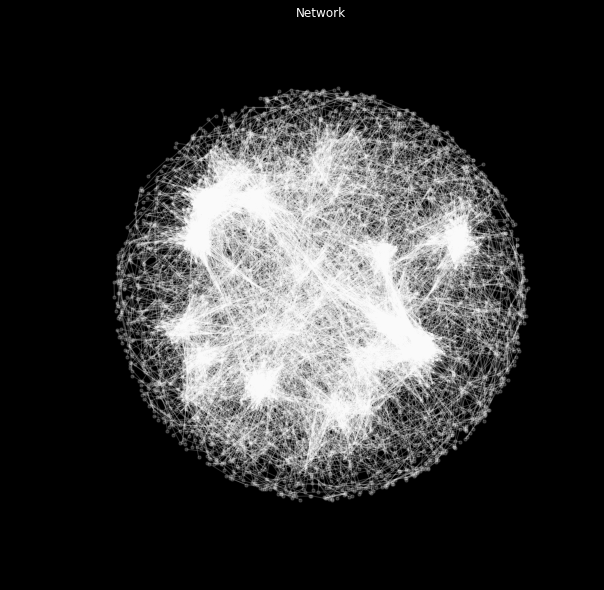

In [4]:
sf.plot_network()

In [5]:
sf.define_neighborhoods()

Node distance metric: shortpath_weighted_layout
Neighborhood definition: 0.10 x diameter
Number of nodes per neighborhood (mean +/- std): 37.50 +/- 56.74


In [6]:
sf.load_attributes()

Loading attributes from /Users/abaryshnikova/Lab/Datasets/safe-data/attributes/hoepfner_movva_2014_doxorubucin.txt

Attribute data provided: 6649 labels x 1 attributes
YAL003W, YAL004W, YAL005C and 3011 other labels in the attribute file were not found in the network.

Attribute data mapped onto the network: 3635 labels x 1 attributes
Values: 1315 NaNs
Values: 1 zeros
Values: 1335 positives
Values: 1320 negatives


In [ ]:
# # Alternatively to the default attribute, you can specify an attribute file to be used instead of the default settings:
# # For format specifications, check the example attribute file. The main format requirements are:
# # * the first column contains the node labels (in this case, yeast ORFs)
# # * each column is an attribute
    
# sf.load_attributes(attribute_file='hoepfner_movva_2014_doxorubucin.txt')

In [7]:
sf.compute_pvalues(num_permutations=1000)

Using randomization to calculate enrichment...
Current settings (possibly overwriting global ones):
	num_permutations=1000


100%|██████████| 1000/1000 [00:55<00:00, 17.96it/s]


In [8]:
# Alternatively, run the same permutations in parallel using 8 cores on this machine
# sf.compute_pvalues(num_permutations=1000, processes=8)

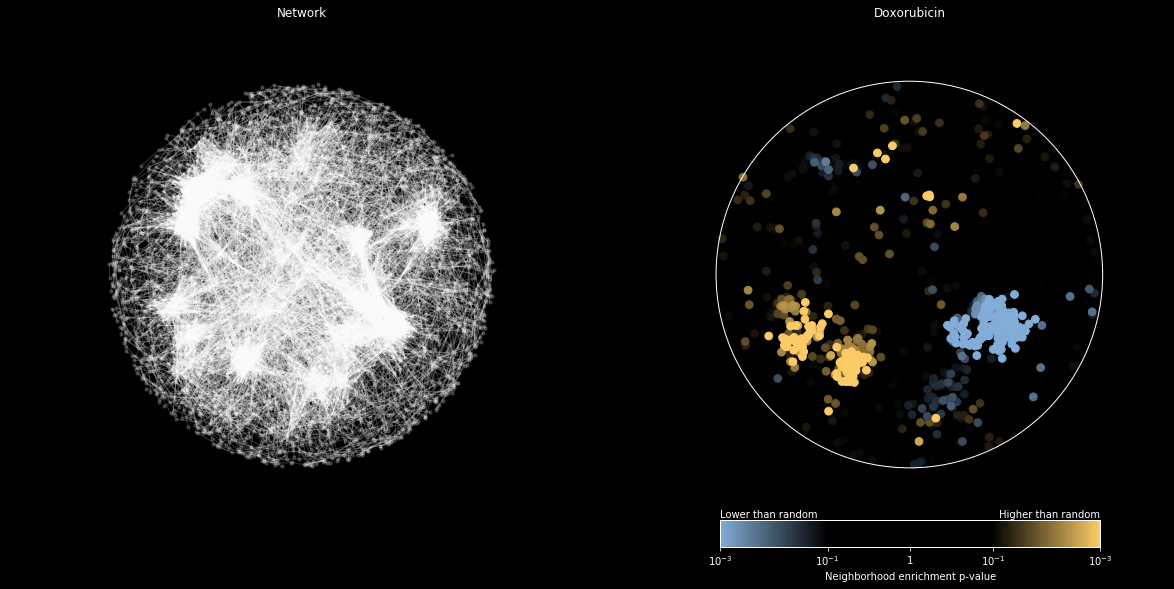

In [15]:
# Plot a random attribute
sf.plot_sample_attributes()

# Also, can specify the name or the index of the attribute to be plotted
# sf.plot_sample_attributes(attributes=['Doxorubicin'])
# sf.plot_sample_attributes(attributes=[0])


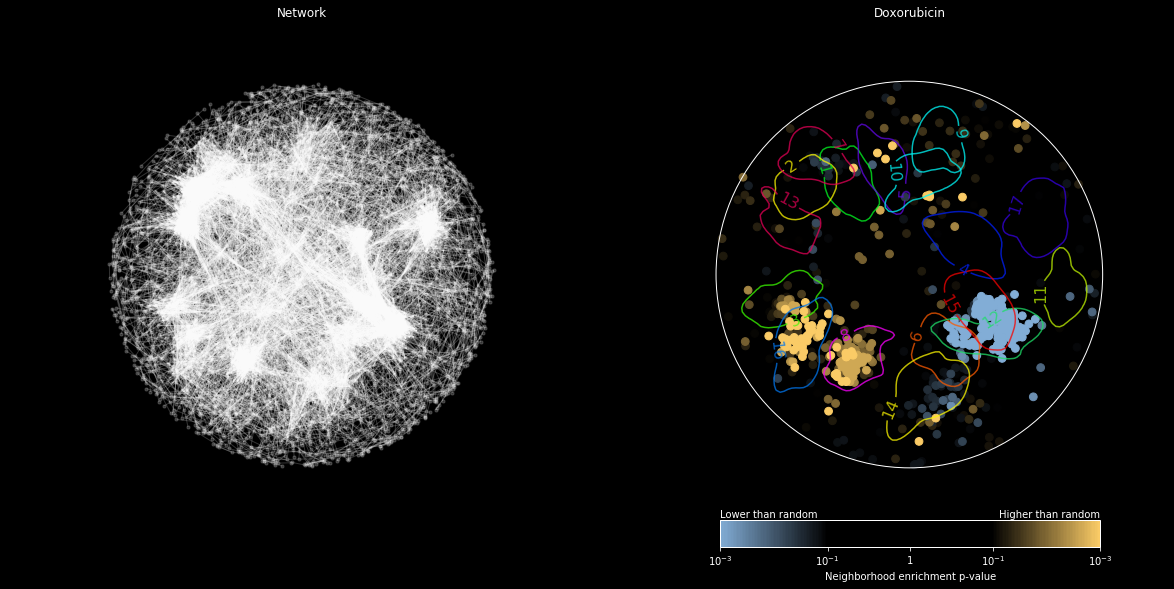

In [10]:
# Show the contours of the functional clusters from Costanzo et al., 2016
sf.plot_sample_attributes(show_costanzo2016=True)

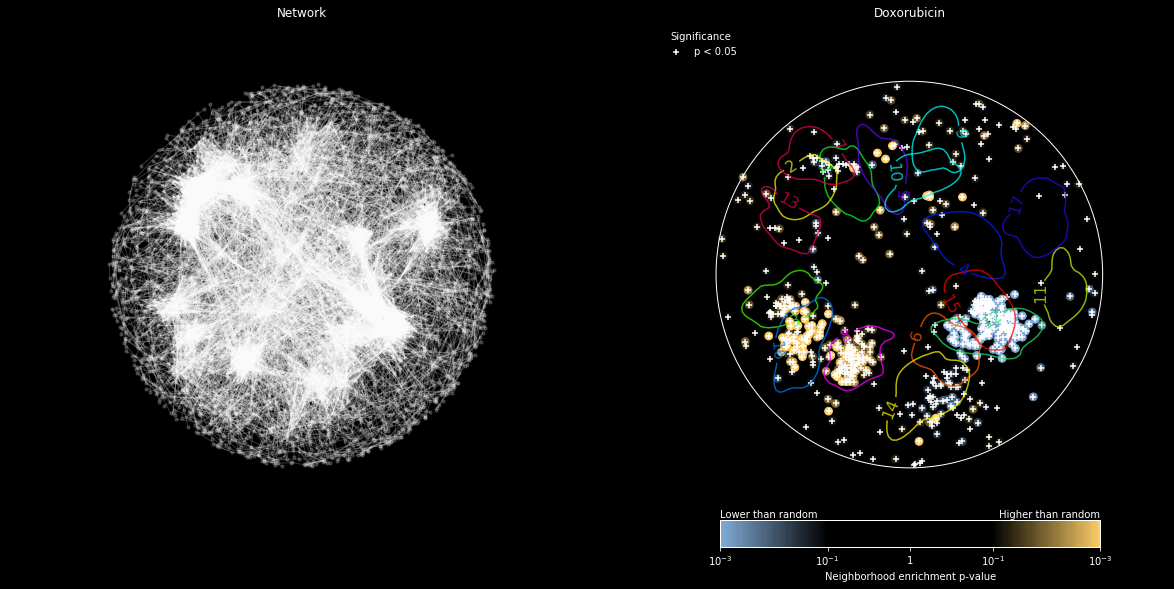

In [11]:
# Map the significant nodes
sf.plot_sample_attributes(show_costanzo2016=True, show_significant_nodes=True)

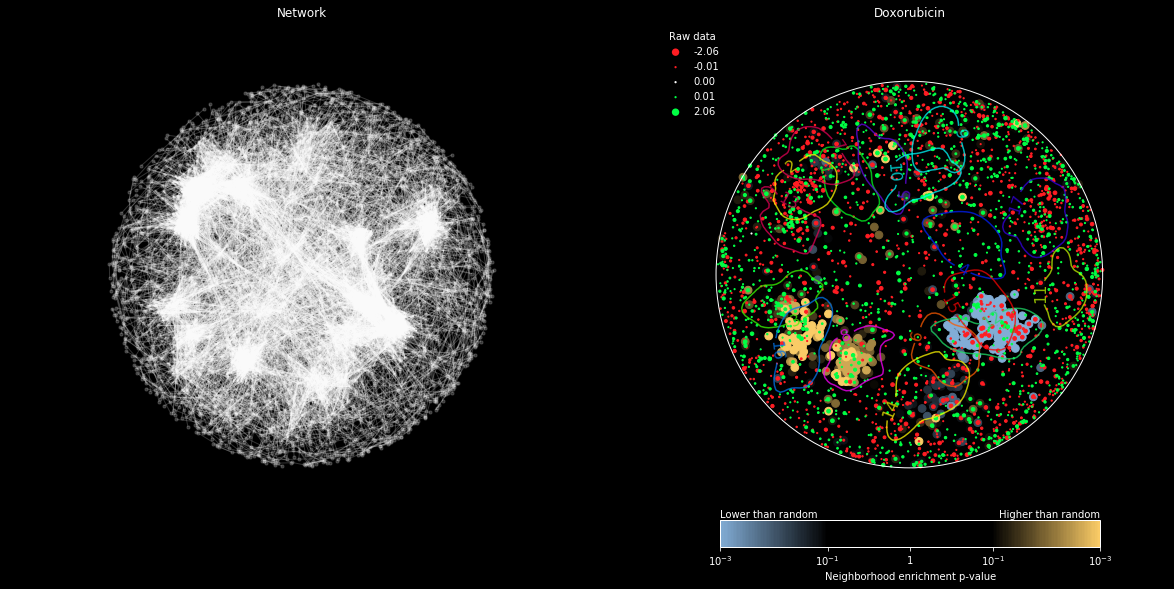

In [12]:
# Map the raw data onto the network
sf.plot_sample_attributes(show_costanzo2016=True, show_raw_data=True)

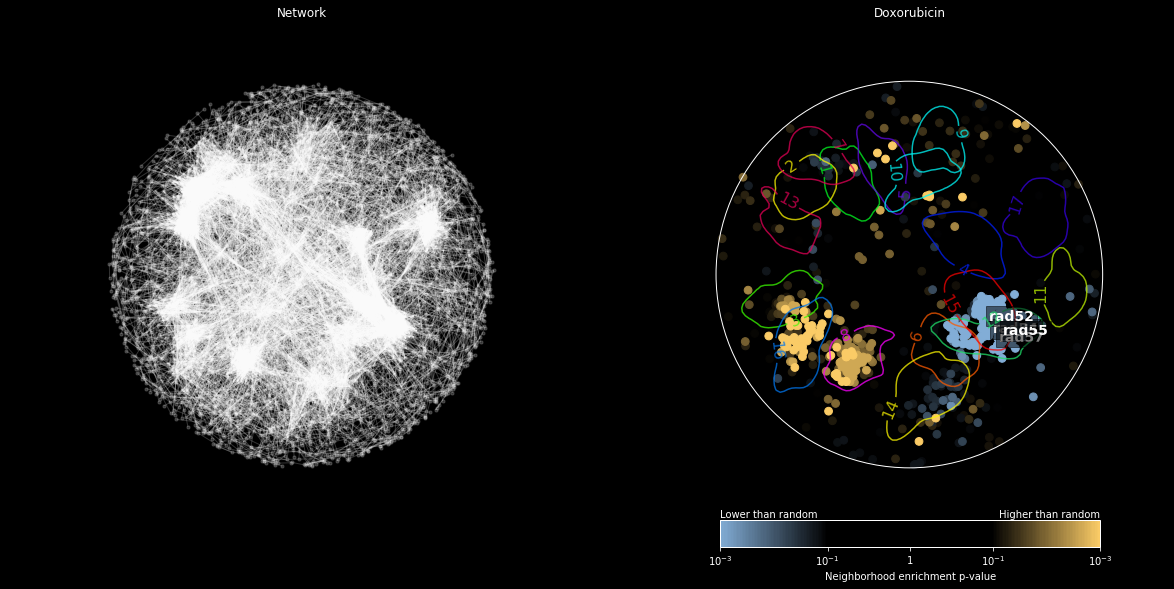

In [13]:
# Map a few labels onto the network
sf.plot_sample_attributes(show_costanzo2016=True, labels=['rad54','rad57','rad55','rad52'])

Output path: /Users/abaryshnikova/Lab/Utils/Python/Networks/safepy/examples/doxorubicin.pdf


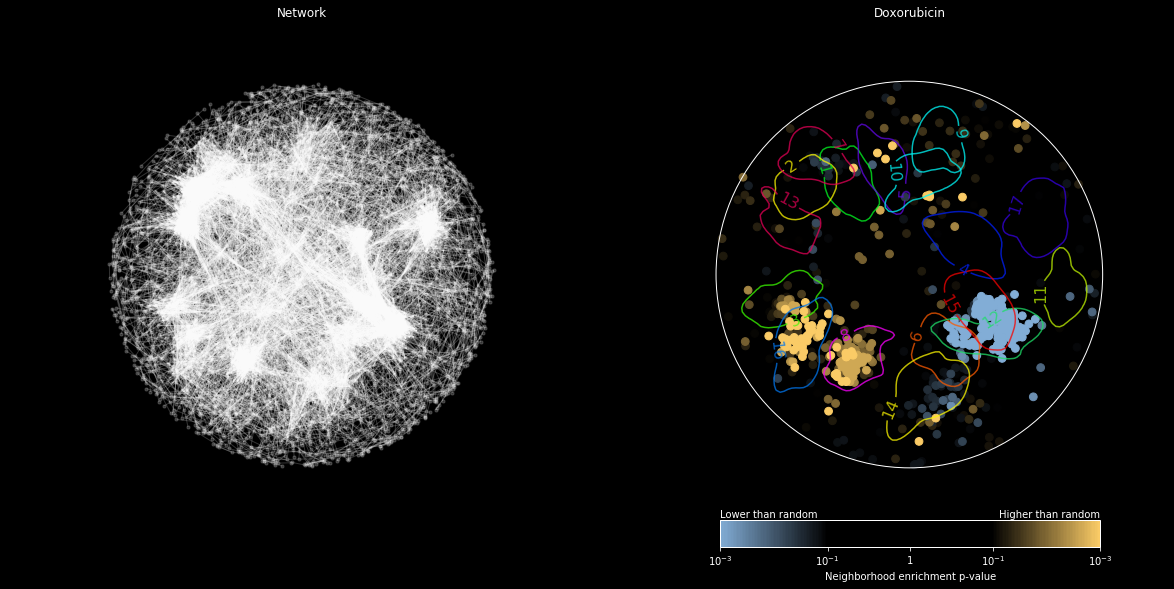

In [14]:
# Show the figure and save it to a PDF file
sf.plot_sample_attributes(show_costanzo2016=True, save_fig='examples/doxorubicin.pdf')

In [15]:
sf.print_output_files()

/Users/abaryshnikova/Lab/Utils/Python/Networks/safepy/attribute_properties_annotation.txt
/Users/abaryshnikova/Lab/Utils/Python/Networks/safepy/node_properties_annotation.txt


# Example 2 -- Annotating your own network with Gene Ontology

In [16]:
sf = safe.SAFE()

### Load and display the network

In [ ]:
# Option 1: Tab-delimited 3-column format (node1 label - node2 label - edge weight). 
# The node labels will be used as keys to map nodes to attributes and therefore have to match the node identifiers in the attribute file.

# sf.load_network(network_file='/Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2010_3col.txt')

In [17]:
# Option 2: Tab-delimited 5-column format (node1 label - node1 key - node2 label - node2 key - edge weight).
# Here, the node keys (e.g., systematic gene names) are provided in addition to the node labels (e.g., common gene names).

sf.load_network(network_file='/Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2010_5col.txt')

Loading network from /Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2010_5col.txt
Applying the spring-embedded network layout... (may take several minutes)
Calculating edge lengths...


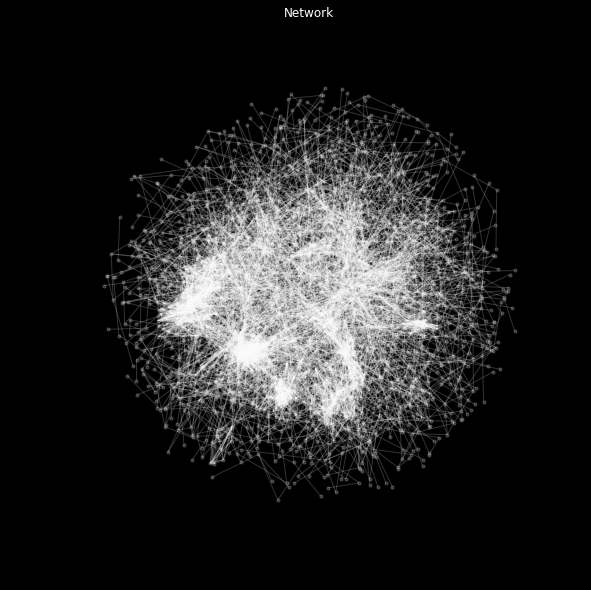

In [18]:
sf.plot_network()

### Load the attributes

The row labels in the attribute file should be matching the node keys in the network.

In [19]:
sf.load_attributes(attribute_file='/Users/abaryshnikova/Lab/Datasets/safe-data/attributes/go_bp_140819.txt.gz')

Loading attributes from /Users/abaryshnikova/Lab/Datasets/safe-data/attributes/go_bp_140819.txt.gz

Attribute data provided: 5911 labels x 4373 attributes
YAL001C, YAL003W, YAL005C and 3329 other labels in the attribute file were not found in the network.

Attribute data mapped onto the network: 2579 labels x 4373 attributes
Values: 979552 NaNs
Values: 11318109 zeros
Values: 112913 positives
Values: 0 negatives


### Define the local neighborhoods and compute their enrichment for each attribute

In [20]:
sf.define_neighborhoods(node_distance_metric='shortpath_weighted_layout', neighborhood_radius=0.15)

Node distance metric: shortpath_weighted_layout
Neighborhood definition: 0.15 x diameter
Number of nodes per neighborhood (mean +/- std): 28.93 +/- 43.44


In [21]:
sf.compute_pvalues()

Using the hypergeometric test to calculate enrichment...


### Plot the enrichment landscapes of a sample of attributes

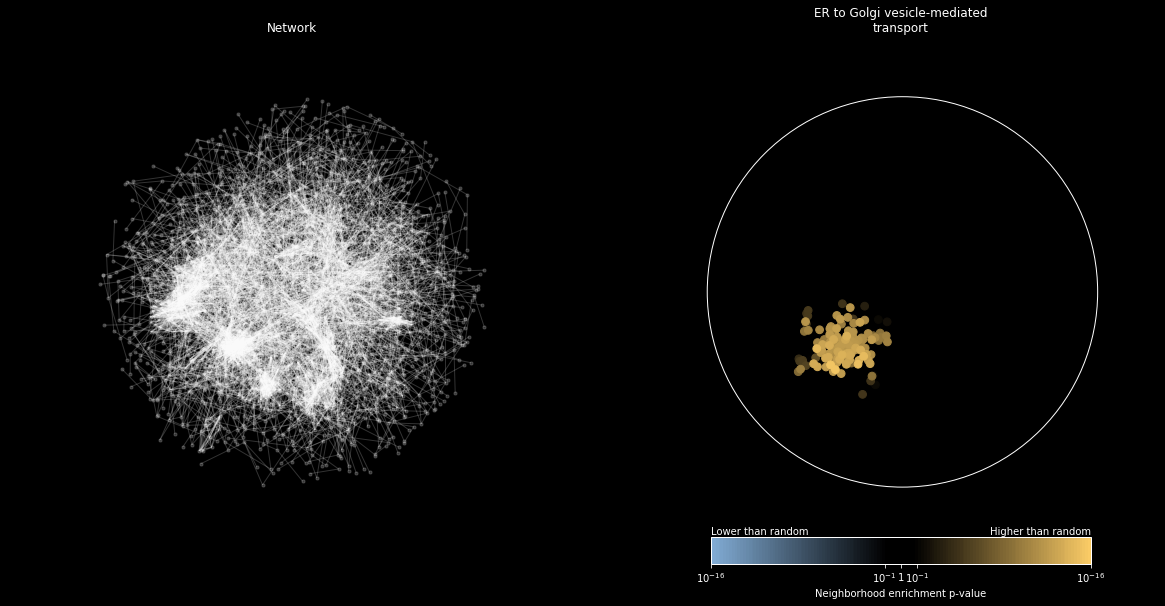

In [22]:
# Just the enrichment itself with min and max boundaries on the colormap
sf.plot_sample_attributes(attributes=[806], vmin=-16, vmax=16)

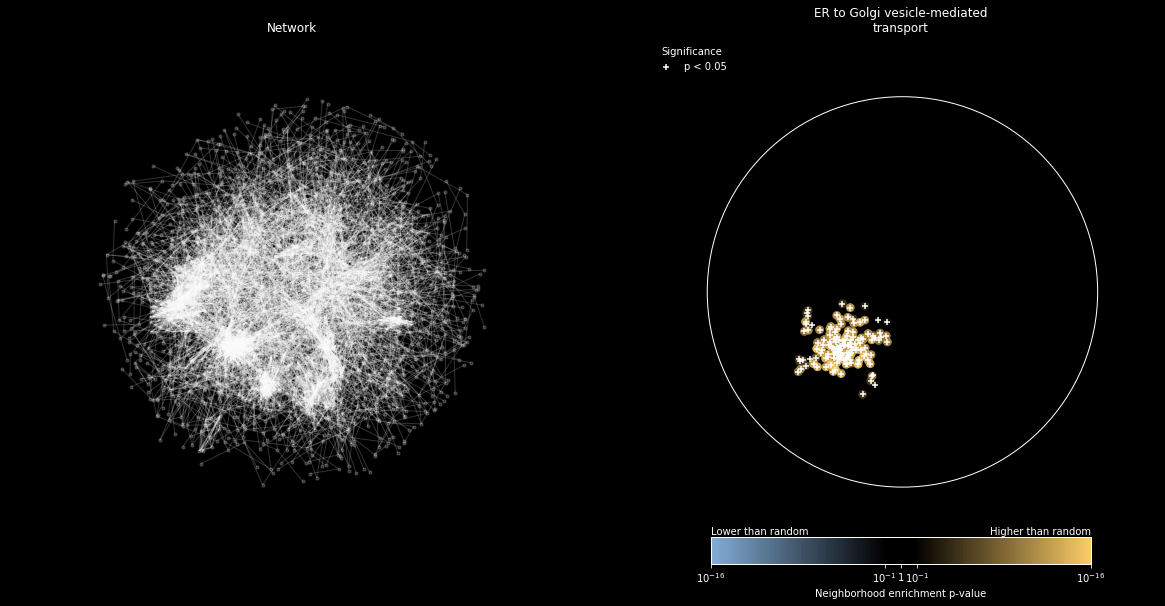

In [23]:
# Show the neighborhoods that are significant (p < 0.05)
sf.plot_sample_attributes(attributes=[806], show_significant_nodes=True, vmin=-16, vmax=16)

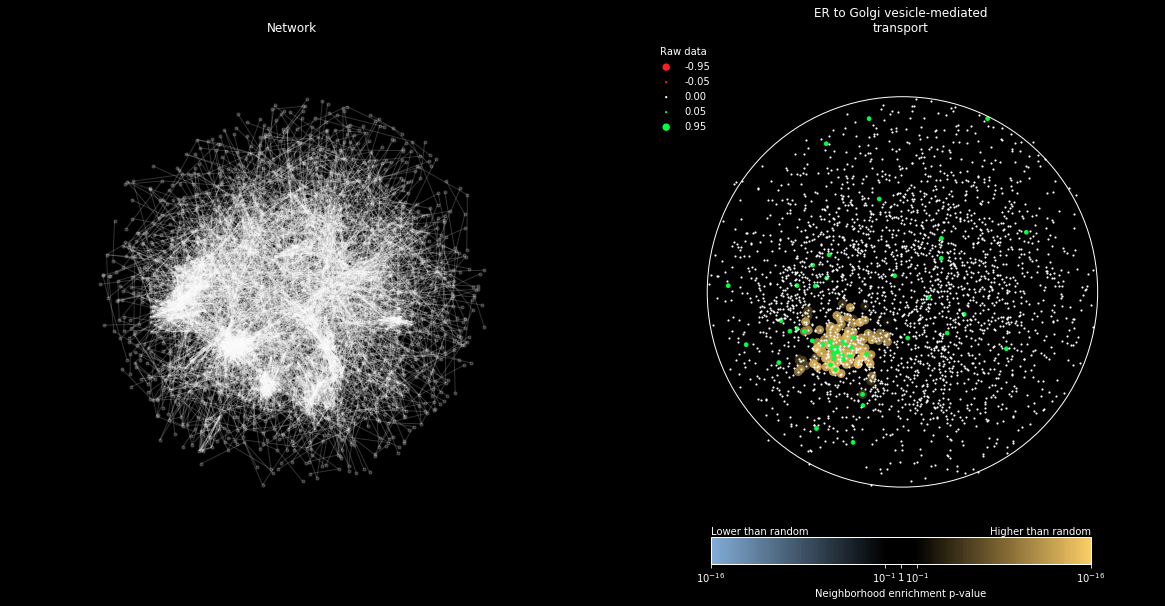

In [24]:
# Show the raw data (nodes annotated to this attribute)
sf.plot_sample_attributes(attributes=[806], show_raw_data=True, vmin=-16, vmax=16)

### Combine the enrichment landscapes into a single composite map

In [25]:
sf.define_top_attributes()

Number of top attributes: 413


In [26]:
sf.define_domains(attribute_distance_threshold = 0.65)

Number of domains: 37 (containing 1-70 attributes)


In [27]:
sf.trim_domains()

Removed 18 domains because they were the top choice for less than 10 neighborhoods.


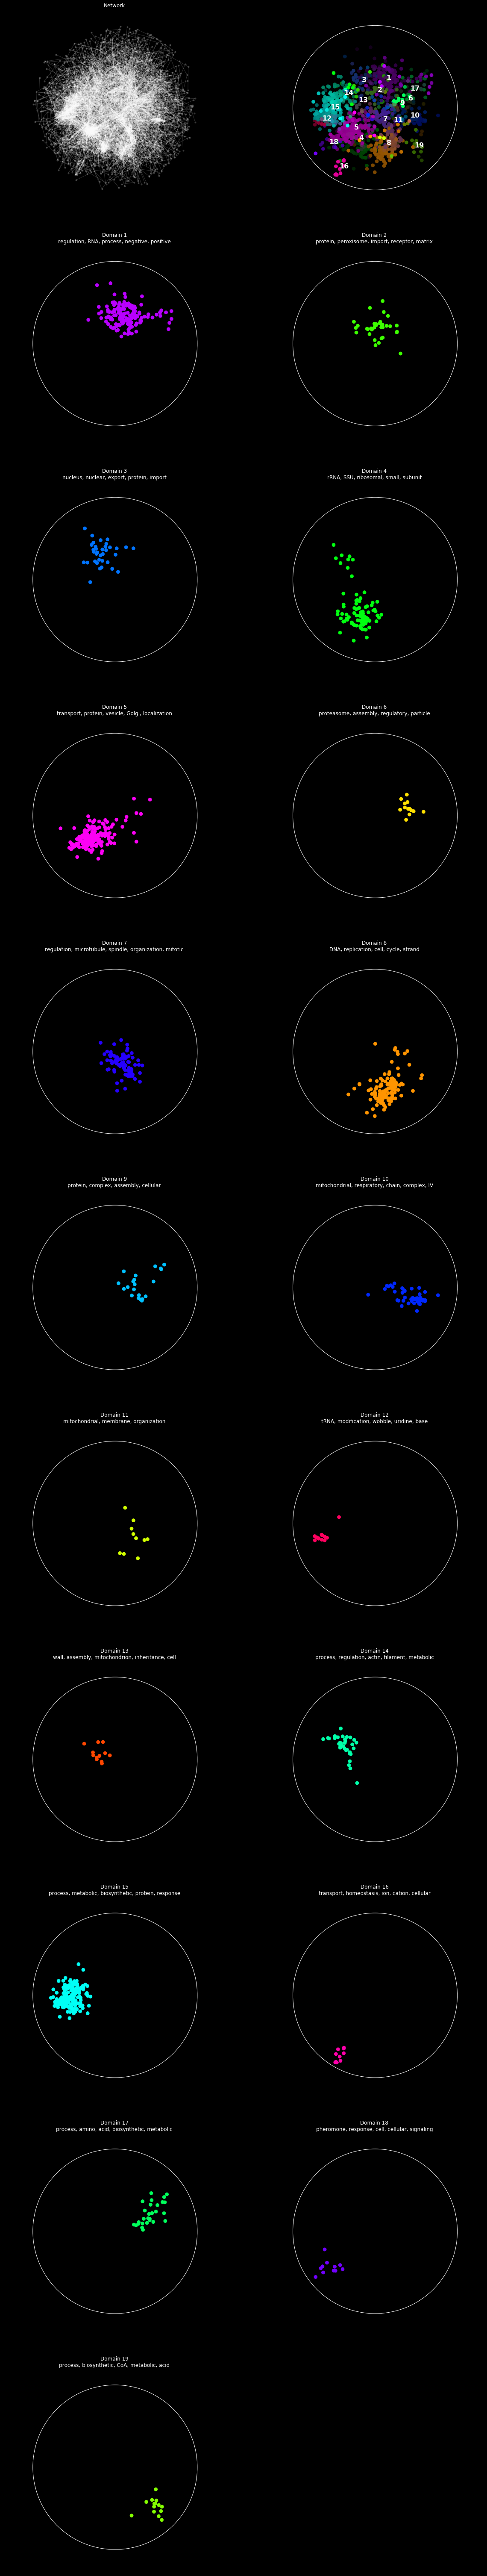

In [28]:
sf.plot_composite_network(show_each_domain=True)

In [29]:
sf.print_output_files()

/Users/abaryshnikova/Lab/Utils/Python/Networks/safepy/domain_properties_annotation.txt
/Users/abaryshnikova/Lab/Utils/Python/Networks/safepy/attribute_properties_annotation.txt
/Users/abaryshnikova/Lab/Utils/Python/Networks/safepy/node_properties_annotation.txt
